<h1>Data Science Capstone Project</h1>
<p style="font-weight: bold;font-style:italic;">The following assignment is to demonstrate all concepts in IBM Data Science course, and this will be the notebook for capstone project of the course</p>
<hr>

In [185]:
import requests
import pandas as pd
import numpy as np
import random
# !pip install beautifulsoup4
from bs4 import BeautifulSoup # library for web scrapping  

# !conda install -c conda-forge geocoder --yes
import geocoder

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Libraries imported.')

Libraries imported.


In [186]:
boroughsOfChicagoWikiURL = 'https://en.wikipedia.org/wiki/Community_areas_in_Chicago'
crimesDatasetOfChicagoURL = 'https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv'

In [187]:
CLIENT_ID = 'FKYXNHTLJEBYPBHIYIBC1MH4SMTRWV1V1IQHXQDNNBKIL4FY' # your Foursquare ID
CLIENT_SECRET = 'XZ4BYD2RHJJALPLNIZLWZCFF5DIV15HSXVVB4BO11USFLE23' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FKYXNHTLJEBYPBHIYIBC1MH4SMTRWV1V1IQHXQDNNBKIL4FY
CLIENT_SECRET:XZ4BYD2RHJJALPLNIZLWZCFF5DIV15HSXVVB4BO11USFLE23


In [191]:
df = pd.read_csv(crimesDatasetOfChicagoURL)
df.head(5)

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [192]:
df.shape

(533, 22)

In [193]:
df.dropna(inplace=True)
df.reset_index()

,index,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,...,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,...,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,...,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,...,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,527,9608166,HX258445,05/12/2014 10:50:00 AM,010XX N WELLS ST,1900,OTHER NARCOTIC VIOLATION,INTOXICATING COMPOUNDS,SIDEWALK,True,...,27.0,8.0,18,1174535.0,1907194.0,2014,02/10/2018 03:50:01 PM,41.900738,-87.634361,"(41.900737976, -87.634361322)"
483,528,10453948,HZ192829,03/01/2016 12:00:00 AM,028XX E 79TH ST,1055,HUMAN TRAFFICKING,INVOLUNTARY SERVITUDE,APARTMENT,False,...,7.0,46.0,26,1196679.0,1853139.0,2016,02/10/2018 03:50:01 PM,41.751885,-87.554826,"(41.751885152, -87.554825997)"
484,529,10397129,HZ133234,01/29/2016 03:30:00 PM,006XX W HARRISON ST,5114,NON - CRIMINAL,FOID - REVOCATION,STREET,False,...,2.0,28.0,26,1172257.0,1897564.0,2016,02/10/2018 03:50:01 PM,41.874363,-87.643013,"(41.874363279, -87.643013039)"
485,530,3269495,HJ747227,11/08/2003 04:54:15 PM,012XX W 81ST ST,510,RITUALISM,AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY,OTHER,False,...,21.0,71.0,04B,1169648.0,1851076.0,2003,02/28/2018 03:56:25 PM,41.746852,-87.653941,"(41.746852486, -87.653941385)"


In [194]:
df.shape

(487, 22)

In [195]:
df.to_csv(r'Chicago_Crimes.csv')

In [196]:
df.describe()

,ID,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE
count,4.870000e+02,487.000000,487.00000,487.000000,487.000000,4.870000e+02,4.870000e+02,487.000000,487.000000,487.000000
mean,6.622419e+06,1194.279261,11.36345,22.624230,37.595483,1.162707e+06,1.886352e+06,2008.969199,41.843787,-87.678434
std,2.828354e+06,665.280757,6.56601,13.088511,21.457648,1.637996e+04,3.036550e+04,4.668989,0.083528,0.059614
min,2.114900e+04,111.000000,1.00000,1.000000,1.000000,1.100658e+06,1.814512e+06,2001.000000,41.645796,-87.905227
25%,3.978664e+06,711.000000,6.00000,12.000000,23.000000,1.151282e+06,1.860430e+06,2005.000000,41.772486,-87.720007
50%,6.780581e+06,1111.000000,11.00000,24.000000,30.000000,1.162315e+06,1.891618e+06,2009.000000,41.858444,-87.679976
75%,9.123182e+06,1652.500000,16.00000,32.000000,58.000000,1.174478e+06,1.908020e+06,2013.000000,41.903339,-87.635440
max,1.127717e+07,2535.000000,25.00000,50.000000,77.000000,1.204126e+06,1.951001e+06,2018.000000,42.021178,-87.528223


In [239]:
last_df = df[df['YEAR'] >= 2010]
last_df.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"
5,7732712,HS540106,09/29/2010 07:59:00 AM,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,...,27.0,24.0,6,1171668.0,1905607.0,2010,02/10/2018 03:50:01 PM,41.896447,-87.644939,"(41.896446772, -87.644938678)"
6,10769475,HZ534771,11/30/2016 01:15:00 AM,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,False,False,...,33.0,14.0,6,1154133.0,1933314.0,2016,02/10/2018 03:50:01 PM,41.972845,-87.708600,"(41.972844913, -87.708600079)"


In [240]:
last_df.describe()

,ID,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE
count,2.100000e+02,210.000000,210.000000,210.000000,210.000000,2.100000e+02,2.100000e+02,210.000000,210.000000,210.000000
mean,9.351758e+06,1123.838095,10.880952,21.204762,39.561905,1.163097e+06,1.883418e+06,2013.609524,41.835727,-87.677087
std,1.458895e+06,654.909711,6.477796,12.358713,20.826659,1.638396e+04,3.026902e+04,2.378111,0.083271,0.059607
min,2.114900e+04,111.000000,1.000000,1.000000,1.000000,1.100955e+06,1.814512e+06,2010.000000,41.645796,-87.904123
25%,8.534049e+06,626.250000,6.000000,12.000000,25.000000,1.153238e+06,1.858286e+06,2012.000000,41.766609,-87.713081
50%,9.446675e+06,1021.000000,10.000000,20.000000,34.000000,1.161784e+06,1.886679e+06,2014.000000,41.844578,-87.681784
75%,1.047773e+07,1530.750000,15.000000,29.750000,59.750000,1.175436e+06,1.905890e+06,2016.000000,41.897746,-87.632935
max,1.127717e+07,2535.000000,25.000000,50.000000,77.000000,1.200405e+06,1.945827e+06,2018.000000,42.007012,-87.542472


In [241]:
last_df = last_df[['COMMUNITY_AREA_NUMBER', 'LATITUDE', 'LONGITUDE', 'PRIMARY_TYPE']]
last_df

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,PRIMARY_TYPE
2,38.0,41.815933,-87.624642,THEFT
3,46.0,41.743665,-87.562463,THEFT
4,66.0,41.773455,-87.706480,THEFT
5,24.0,41.896447,-87.644939,THEFT
6,14.0,41.972845,-87.708600,THEFT
...,...,...,...,...
526,11.0,41.979595,-87.758821,NON-CRIMINAL
527,8.0,41.900738,-87.634361,OTHER NARCOTIC VIOLATION
528,46.0,41.751885,-87.554826,HUMAN TRAFFICKING
529,28.0,41.874363,-87.643013,NON - CRIMINAL


In [242]:
last_df.reset_index(inplace=True)
last_df

,index,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,PRIMARY_TYPE
0,2,38.0,41.815933,-87.624642,THEFT
1,3,46.0,41.743665,-87.562463,THEFT
2,4,66.0,41.773455,-87.706480,THEFT
3,5,24.0,41.896447,-87.644939,THEFT
4,6,14.0,41.972845,-87.708600,THEFT
...,...,...,...,...,...
205,526,11.0,41.979595,-87.758821,NON-CRIMINAL
206,527,8.0,41.900738,-87.634361,OTHER NARCOTIC VIOLATION
207,528,46.0,41.751885,-87.554826,HUMAN TRAFFICKING
208,529,28.0,41.874363,-87.643013,NON - CRIMINAL


In [243]:
last_df.drop(['index'], axis=1, inplace=True)
last_df

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,PRIMARY_TYPE
0,38.0,41.815933,-87.624642,THEFT
1,46.0,41.743665,-87.562463,THEFT
2,66.0,41.773455,-87.706480,THEFT
3,24.0,41.896447,-87.644939,THEFT
4,14.0,41.972845,-87.708600,THEFT
...,...,...,...,...
205,11.0,41.979595,-87.758821,NON-CRIMINAL
206,8.0,41.900738,-87.634361,OTHER NARCOTIC VIOLATION
207,46.0,41.751885,-87.554826,HUMAN TRAFFICKING
208,28.0,41.874363,-87.643013,NON - CRIMINAL


In [259]:
vc_frame = pd.DataFrame(last_df['COMMUNITY_AREA_NUMBER'].value_counts())
vc_frame.columns = ['TotalNumberOfCrimes']
vc_frame

,TotalNumberOfCrimes
25.0,14
29.0,11
67.0,9
68.0,8
28.0,8
...,...
15.0,1
1.0,1
56.0,1
75.0,1


In [260]:
vc_frame['COMMUNITY_AREA_NUMBER'] = vc_frame.index
vc_frame

,TotalNumberOfCrimes,COMMUNITY_AREA_NUMBER
25.0,14,25.0
29.0,11,29.0
67.0,9,67.0
68.0,8,68.0
28.0,8,28.0
...,...,...
15.0,1,15.0
1.0,1,1.0
56.0,1,56.0
75.0,1,75.0


In [261]:
vc_frame.reset_index(inplace=True)
vc_frame

,index,TotalNumberOfCrimes,COMMUNITY_AREA_NUMBER
0,25.0,14,25.0
1,29.0,11,29.0
2,67.0,9,67.0
3,68.0,8,68.0
4,28.0,8,28.0
...,...,...,...
61,15.0,1,15.0
62,1.0,1,1.0
63,56.0,1,56.0
64,75.0,1,75.0


In [262]:
vc_frame.drop(['index'], axis=1, inplace=True)
vc_frame

,TotalNumberOfCrimes,COMMUNITY_AREA_NUMBER
0,14,25.0
1,11,29.0
2,9,67.0
3,8,68.0
4,8,28.0
...,...,...
61,1,15.0
62,1,1.0
63,1,56.0
64,1,75.0


In [266]:
grouped_frame = last_df.groupby(['COMMUNITY_AREA_NUMBER']).first()
grouped_frame

,LATITUDE,LONGITUDE,PRIMARY_TYPE
COMMUNITY_AREA_NUMBER,,,
1.0,42.007012,-87.677996,THEFT
2.0,41.997545,-87.700467,THEFT
3.0,41.960047,-87.646762,NARCOTICS
4.0,41.978146,-87.675074,CRIMINAL DAMAGE
5.0,41.943124,-87.686031,BATTERY
...,...,...,...
72.0,41.722249,-87.669754,BURGLARY
73.0,41.721537,-87.637490,THEFT
75.0,41.694422,-87.663303,THEFT


In [267]:
grouped_frame.reset_index(inplace=True)
grouped_frame

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,PRIMARY_TYPE
0,1.0,42.007012,-87.677996,THEFT
1,2.0,41.997545,-87.700467,THEFT
2,3.0,41.960047,-87.646762,NARCOTICS
3,4.0,41.978146,-87.675074,CRIMINAL DAMAGE
4,5.0,41.943124,-87.686031,BATTERY
...,...,...,...,...
61,72.0,41.722249,-87.669754,BURGLARY
62,73.0,41.721537,-87.637490,THEFT
63,75.0,41.694422,-87.663303,THEFT
64,76.0,41.981100,-87.838033,THEFT


In [269]:
ldf = pd.merge(grouped_frame, vc_frame, on='COMMUNITY_AREA_NUMBER')
ldf

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,PRIMARY_TYPE,TotalNumberOfCrimes
0,1.0,42.007012,-87.677996,THEFT,1
1,2.0,41.997545,-87.700467,THEFT,3
2,3.0,41.960047,-87.646762,NARCOTICS,1
3,4.0,41.978146,-87.675074,CRIMINAL DAMAGE,1
4,5.0,41.943124,-87.686031,BATTERY,1
...,...,...,...,...,...
61,72.0,41.722249,-87.669754,BURGLARY,2
62,73.0,41.721537,-87.637490,THEFT,1
63,75.0,41.694422,-87.663303,THEFT,1
64,76.0,41.981100,-87.838033,THEFT,2


In [270]:
ldf.describe()

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,TotalNumberOfCrimes
count,66.000000,66.000000,66.000000,66.000000
mean,39.272727,41.841024,-87.674082,3.181818
std,22.839605,0.096604,0.064561,2.665501
min,1.000000,41.645796,-87.838033,1.000000
25%,20.250000,41.765824,-87.714602,1.000000
50%,40.000000,41.833632,-87.671024,2.000000
75%,59.750000,41.931122,-87.624564,4.000000
max,77.000000,42.007012,-87.542472,14.000000


In [271]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="chicago_agent")

In [272]:
lat = np.asarray(ldf['LATITUDE'])
lon = np.asarray(ldf['LONGITUDE'])
names = []
for i in range(lat.size):
    la = lat[i]
    lo = lon[i]
    t = (la,lo)
    placeName = geolocator.reverse(t)
    address = str(placeName).split(", ")[1:-4]
    l = len(address)
    names.append(address[l - 2])
print(names)

['Rogers Park', 'West Ridge', 'Uptown', 'Lincoln Square', 'North Center', 'Lincoln Park', 'Lincoln Park', 'Near North Side', 'Norwood Park', 'Jefferson Park', 'Albany Park', 'Portage Park', 'Irving Park', 'Dunning', 'Montclare', 'Belmont Cragin', 'Belmont Cragin', 'Logan Square', 'Maplewood', 'Humboldt Park', 'West Town', 'Austin', 'West Garfield Park', 'East Garfield Park', 'Near West Side', 'North Lawndale', 'South Lawndale', 'Lower West Side', 'Loop', 'Near South Side', 'Douglas', 'Washington Park', 'Oakland', 'Kenwood', 'Washington Park', 'South Shore', 'Chatham', 'Avalon Park', 'South Chicago', 'Calumet Heights', 'Roseland', 'Burnside', 'South Deering', 'West Pullman', 'Riverdale', 'Hegewisch', 'Garfield Ridge', 'Brighton Park', 'McKinley Park', 'Bridgeport', 'New City', 'West Elsdon', 'Chicago Lawn', 'Clearing', 'West Lawn', 'West Lawn', 'West Englewood', 'Englewood', 'Greater Grand Crossing', 'Ashburn', 'Auburn Gresham', 'Beverly', 'Washington Heights', 'Morgan Park', "O'Hare", 

In [273]:
ldf['Boroughs'] = names
ldf

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,PRIMARY_TYPE,TotalNumberOfCrimes,Boroughs
0,1.0,42.007012,-87.677996,THEFT,1,Rogers Park
1,2.0,41.997545,-87.700467,THEFT,3,West Ridge
2,3.0,41.960047,-87.646762,NARCOTICS,1,Uptown
3,4.0,41.978146,-87.675074,CRIMINAL DAMAGE,1,Lincoln Square
4,5.0,41.943124,-87.686031,BATTERY,1,North Center
...,...,...,...,...,...,...
61,72.0,41.722249,-87.669754,BURGLARY,2,Beverly
62,73.0,41.721537,-87.637490,THEFT,1,Washington Heights
63,75.0,41.694422,-87.663303,THEFT,1,Morgan Park
64,76.0,41.981100,-87.838033,THEFT,2,O'Hare


In [274]:
ldf.drop(['PRIMARY_TYPE'], axis=1, inplace=True)
ldf

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,TotalNumberOfCrimes,Boroughs
0,1.0,42.007012,-87.677996,1,Rogers Park
1,2.0,41.997545,-87.700467,3,West Ridge
2,3.0,41.960047,-87.646762,1,Uptown
3,4.0,41.978146,-87.675074,1,Lincoln Square
4,5.0,41.943124,-87.686031,1,North Center
...,...,...,...,...,...
61,72.0,41.722249,-87.669754,2,Beverly
62,73.0,41.721537,-87.637490,1,Washington Heights
63,75.0,41.694422,-87.663303,1,Morgan Park
64,76.0,41.981100,-87.838033,2,O'Hare


In [276]:
ldf.to_csv(r'chicago_df_table.csv')

In [275]:
# last_df['NumberOfCrimes'] = pd.Series(0, index=last_df.index)
# last_df

In [282]:
sorted_ldf = ldf.sort_values(by='TotalNumberOfCrimes', ascending=False)
sorted_ldf

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,TotalNumberOfCrimes,Boroughs
21,25.0,41.875659,-87.762569,14,Austin
25,29.0,41.854811,-87.716310,11,North Lawndale
56,67.0,41.787324,-87.664412,9,West Englewood
24,28.0,41.865761,-87.646876,8,Near West Side
57,68.0,41.779794,-87.631827,8,Englewood
...,...,...,...,...,...
30,35.0,41.828502,-87.619279,1,Douglas
32,39.0,41.807068,-87.603844,1,Oakland
39,48.0,41.737116,-87.571657,1,Calumet Heights
42,51.0,41.721774,-87.578985,1,South Deering


In [283]:
sorted_ldf.reset_index(inplace=True)
sorted_ldf

,index,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,TotalNumberOfCrimes,Boroughs
0,21,25.0,41.875659,-87.762569,14,Austin
1,25,29.0,41.854811,-87.716310,11,North Lawndale
2,56,67.0,41.787324,-87.664412,9,West Englewood
3,24,28.0,41.865761,-87.646876,8,Near West Side
4,57,68.0,41.779794,-87.631827,8,Englewood
...,...,...,...,...,...,...
61,30,35.0,41.828502,-87.619279,1,Douglas
62,32,39.0,41.807068,-87.603844,1,Oakland
63,39,48.0,41.737116,-87.571657,1,Calumet Heights
64,42,51.0,41.721774,-87.578985,1,South Deering


In [284]:
sorted_ldf.drop('index', axis=1, inplace=True)
sorted_ldf

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,TotalNumberOfCrimes,Boroughs
0,25.0,41.875659,-87.762569,14,Austin
1,29.0,41.854811,-87.716310,11,North Lawndale
2,67.0,41.787324,-87.664412,9,West Englewood
3,28.0,41.865761,-87.646876,8,Near West Side
4,68.0,41.779794,-87.631827,8,Englewood
...,...,...,...,...,...
61,35.0,41.828502,-87.619279,1,Douglas
62,39.0,41.807068,-87.603844,1,Oakland
63,48.0,41.737116,-87.571657,1,Calumet Heights
64,51.0,41.721774,-87.578985,1,South Deering


In [277]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


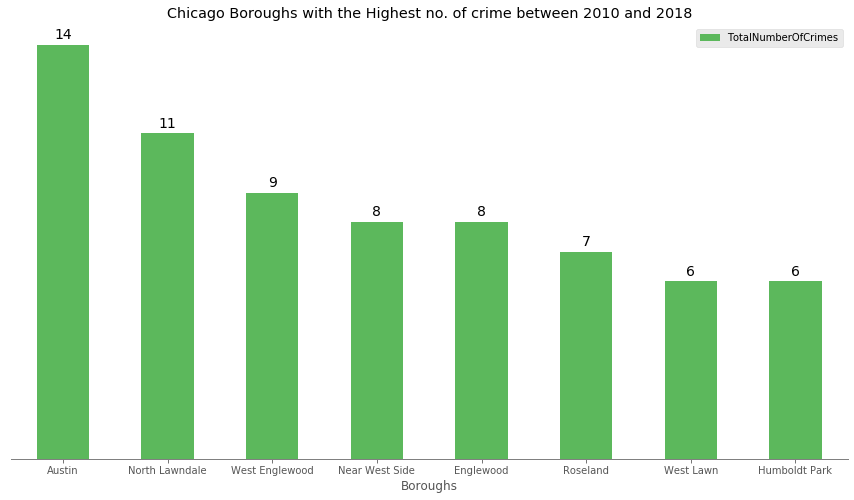

In [286]:
highest_df = sorted_ldf.head(8)[['Boroughs', 'TotalNumberOfCrimes']]
highest_df.set_index('Boroughs',inplace = True)
ax = to_draw.plot(kind='bar', color='#5cb85c',grid=False, yticks=[], figsize=(15, 8), rot=0)
# ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Boroughs')
ax.set_title('Chicago Boroughs with the Highest no. of crime between 2010 and 2018')

ax.set_facecolor('white')
ax.spines['bottom'].set_color('gray')


for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [288]:
sorted_ldf.tail(8)

,COMMUNITY_AREA_NUMBER,LATITUDE,LONGITUDE,TotalNumberOfCrimes,Boroughs
58,55.0,41.645796,-87.542472,1,Hegewisch
59,20.0,41.931581,-87.742957,1,Belmont Cragin
60,33.0,41.846860,-87.617324,1,Near South Side
61,35.0,41.828502,-87.619279,1,Douglas
62,39.0,41.807068,-87.603844,1,Oakland
63,48.0,41.737116,-87.571657,1,Calumet Heights
64,51.0,41.721774,-87.578985,1,South Deering
65,77.0,41.981153,-87.669750,1,Edgewater


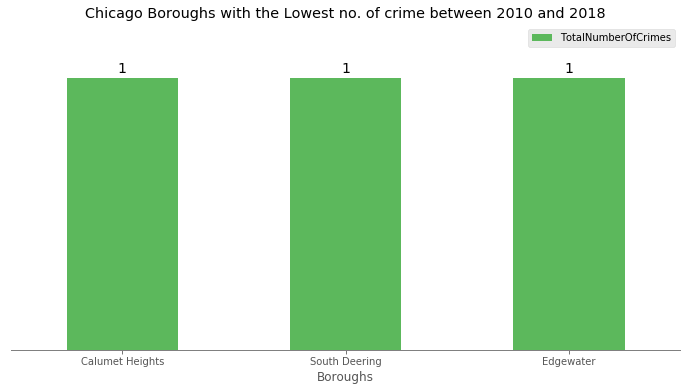

In [311]:
lowest_df = sorted_ldf.tail(3)[['Boroughs', 'TotalNumberOfCrimes']]
lowest_df.set_index('Boroughs',inplace = True)
ax = lowest_df.plot(kind='bar', color='#5cb85c',grid=False, yticks=[], figsize=(12, 6), rot=0)
# ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Boroughs')
ax.set_title('Chicago Boroughs with the Lowest no. of crime between 2010 and 2018')

ax.set_facecolor('white')
ax.spines['bottom'].set_color('gray')
ax.margins(.2)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [404]:
# https://en.wikipedia.org/wiki/Edgewater,_Chicago
# https://en.wikipedia.org/wiki/South_Deering,_Chicago
Edgewater_Neighborhoods = ['Andersonville', 'Edgewater Glen', 'Broadway', 'Edgewater Beach']
SouthDeering_Neighborhoods = ['Irondale', 'Jeffery Manor', 'Vet\'s Park']

In [405]:
edgewater_df = pd.DataFrame({'Neighborhoods': Edgewater_Neighborhoods})
edgewater_df

,Neighborhoods
0,Andersonville
1,Edgewater Glen
2,Broadway
3,Edgewater Beach


In [406]:
edgewater_df['Boroughs'] = pd.Series('Edgewater', index=edgewater_df.index)
#edgewater_df['LATITUDE'] = pd.Series(np.nan, index=edgewater_df.index)
#edgewater_df['LONGITUDE'] = pd.Series(np.nan, index=edgewater_df.index)
edgewater_df

,Neighborhoods,Boroughs
0,Andersonville,Edgewater
1,Edgewater Glen,Edgewater
2,Broadway,Edgewater
3,Edgewater Beach,Edgewater


In [407]:
SouthDeering_df = pd.DataFrame({'Neighborhoods': SouthDeering_Neighborhoods})
SouthDeering_df

,Neighborhoods
0,Irondale
1,Jeffery Manor
2,Vet's Park


In [408]:
SouthDeering_df['Boroughs'] = pd.Series('South Deering', index=SouthDeering_df.index)
#SouthDeering_df['LATITUDE'] = pd.Series(np.nan, index=SouthDeering_df.index)
#SouthDeering_df['LONGITUDE'] = pd.Series(np.nan, index=SouthDeering_df.index)
SouthDeering_df

,Neighborhoods,Boroughs
0,Irondale,South Deering
1,Jeffery Manor,South Deering
2,Vet's Park,South Deering


In [409]:
Neigh_df = edgewater_df.append(SouthDeering_df)
Neigh_df

,Neighborhoods,Boroughs
0,Andersonville,Edgewater
1,Edgewater Glen,Edgewater
2,Broadway,Edgewater
3,Edgewater Beach,Edgewater
0,Irondale,South Deering
1,Jeffery Manor,South Deering
2,Vet's Park,South Deering


In [403]:
Latitudes = []
Longitudes = []

for i in range(len(Edgewater_Neighborhoods)):
    address = '{}, Chicago, USA'.format(Edgewater_Neighborhoods[i])
    geolocator = Nominatim(user_agent="Chicago_USA_Agent")
    location = geolocator.geocode(address)
    print(location)
    if not location is None:
        Latitudes.append(location.latitude)
        Longitudes.append(location.longitude)
    
for i in range(len(SouthDeering_Neighborhoods)):
    address = '{}, Chicago, USA'.format(SouthDeering_Neighborhoods[i])
    geolocator = Nominatim(user_agent="Chicago_USA_Agent")
    location = geolocator.geocode(address)
    print(location)
    if not location is None:
        Latitudes.append(location.latitude)
        Longitudes.append(location.longitude)
    
print(Latitudes, Longitudes)

5233, Summerdale, Edgewater, Chicago, Cook County, Illinois, 60640, United States of America
Edgewater Glen, Edgewater, Chicago, Cook County, Illinois, 60660, United States of America
Broadway, Five Points, Great Lakes, North Chicago, Lake County, Illinois, 60064, United States of America
Edgewater, Chicago, Cook County, Illinois, 60660, United States of America
Irondale, South Deering, Chicago, Cook County, Illinois, 60617, United States of America
Jeffery Manor, South Deering, Chicago, Cook County, Illinois, 60617, United States of America
Vet's Park, South Deering, Chicago, Cook County, Illinois, 60617, United States of America
[41.9771393, 41.9923905, 42.321528, 41.9833689, 41.7105906, 41.7150348, 41.7173766] [-87.66927341557962, -87.664046, -87.849368, -87.6639516, -87.5522676, -87.5700461, -87.5538454]


In [410]:
Neigh_df['Latitude'] = Latitudes
Neigh_df['Longitude'] = Longitudes
Neigh_df

,Neighborhoods,Boroughs,Latitude,Longitude
0,Andersonville,Edgewater,41.977139,-87.669273
1,Edgewater Glen,Edgewater,41.992390,-87.664046
2,Broadway,Edgewater,42.321528,-87.849368
3,Edgewater Beach,Edgewater,41.983369,-87.663952
0,Irondale,South Deering,41.710591,-87.552268
1,Jeffery Manor,South Deering,41.715035,-87.570046
2,Vet's Park,South Deering,41.717377,-87.553845


In [348]:
lc = np.asarray(sorted_ldf.iloc[65, 1:3])
latitude = lc[0]
longitude = lc[1]

In [416]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Neigh_df['Latitude'], Neigh_df['Longitude'], Neigh_df['Boroughs'], Neigh_df['Neighborhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [417]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [421]:
venues = getNearbyVenues(names=Neigh_df['Neighborhoods'],
                                   latitudes=Neigh_df['Latitude'],
                                   longitudes=Neigh_df['Longitude']
                                  )

Andersonville
Edgewater Glen
Broadway
Edgewater Beach
Irondale
Jeffery Manor
Vet's Park


In [422]:
venues.shape

(103, 7)

In [423]:
venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andersonville,41.977139,-87.669273,Lost Larson Bakery,41.978617,-87.668411,Bakery
1,Andersonville,41.977139,-87.669273,Taste of Lebanon,41.976151,-87.668847,Middle Eastern Restaurant
2,Andersonville,41.977139,-87.669273,Middle East Bakery & Grocery & Café,41.976213,-87.668610,Grocery Store
3,Andersonville,41.977139,-87.669273,Kopi Café,41.978612,-87.668298,Café
4,Andersonville,41.977139,-87.669273,George's Ice Cream & Sweets,41.978299,-87.668468,Ice Cream Shop
5,Andersonville,41.977139,-87.669273,Andersonville Wine and Spirits,41.976188,-87.668425,Wine Shop
6,Andersonville,41.977139,-87.669273,Hopleaf Bar,41.975813,-87.668509,Beer Bar
7,Andersonville,41.977139,-87.669273,Neo-Futurists,41.975943,-87.669356,Indie Theater
8,Andersonville,41.977139,-87.669273,Lady Gregory's,41.977898,-87.668511,Irish Pub
9,Andersonville,41.977139,-87.669273,Ora,41.975715,-87.668389,Sushi Restaurant


In [424]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Andersonville,30,30,30,30,30,30
Broadway,1,1,1,1,1,1
Edgewater Beach,30,30,30,30,30,30
Edgewater Glen,30,30,30,30,30,30
Irondale,3,3,3,3,3,3
Jeffery Manor,3,3,3,3,3,3
Vet's Park,6,6,6,6,6,6


In [425]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 60 uniques categories.


In [427]:
# one hot encoding
ven_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ven_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ven_onehot.columns[-1]] + list(ven_onehot.columns[:-1])
ven_onehot = ven_onehot[fixed_columns]

ven_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Asian Restaurant,Bakery,Bar,Basketball Court,Beer Bar,Bookstore,...,Southern / Soul Food Restaurant,Spa,Sushi Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Andersonville,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [428]:
ven_grouped = ven_onehot.groupby('Neighborhood').mean().reset_index()
ven_grouped

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Asian Restaurant,Bakery,Bar,Basketball Court,Beer Bar,Bookstore,...,Southern / Soul Food Restaurant,Spa,Sushi Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Andersonville,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
1,Broadway,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Edgewater Beach,0.000000,0.033333,0.033333,0.100000,0.033333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066667,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000
3,Edgewater Glen,0.033333,0.000000,0.033333,0.066667,0.033333,0.033333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.033333,0.033333
4,Irondale,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Jeffery Manor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Vet's Park,0.000000,0.166667,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000


In [429]:
num_top_venues = 5

for hood in ven_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ven_grouped[ven_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Andersonville----
                       venue  freq
0  Middle Eastern Restaurant  0.07
1                  Irish Pub  0.03
2                   Pie Shop  0.03
3               Optical Shop  0.03
4                  Gift Shop  0.03


----Broadway----
                      venue  freq
0            Discount Store   1.0
1        African Restaurant   0.0
2        Italian Restaurant   0.0
3         Martial Arts Dojo   0.0
4  Mediterranean Restaurant   0.0


----Edgewater Beach----
                  venue  freq
0      Asian Restaurant  0.10
1      Sushi Restaurant  0.07
2  Gym / Fitness Center  0.07
3           Coffee Shop  0.07
4         Deli / Bodega  0.03


----Edgewater Glen----
              venue  freq
0     Grocery Store  0.07
1  Asian Restaurant  0.07
2          Wine Bar  0.07
3   Thai Restaurant  0.07
4    Sandwich Place  0.07


----Irondale----
                 venue  freq
0  American Restaurant  0.33
1                  Bar  0.33
2    Food & Drink Shop  0.33
3           Restaurant 

In [430]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [432]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ven_grouped['Neighborhood']

for ind in np.arange(ven_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ven_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andersonville,Middle Eastern Restaurant,Indie Theater,Pet Store,Grocery Store,Gym,Ice Cream Shop,Comic Shop,Wine Shop,Irish Pub,Italian Restaurant
1,Broadway,Discount Store,Wings Joint,Wine Shop,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Grocery Store,Greek Restaurant
2,Edgewater Beach,Asian Restaurant,Coffee Shop,Sushi Restaurant,Gym / Fitness Center,Grocery Store,Hobby Shop,Korean Restaurant,Deli / Bodega,Mexican Restaurant,Indian Restaurant
3,Edgewater Glen,Sandwich Place,Wine Bar,Thai Restaurant,Asian Restaurant,Gym / Fitness Center,Mexican Restaurant,Grocery Store,Wings Joint,Wine Shop,Ice Cream Shop
4,Irondale,American Restaurant,Bar,Food & Drink Shop,Wings Joint,Deli / Bodega,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym


In [433]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

ven_grouped_clustering = ven_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ven_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 1, 1, 0, 3, 4], dtype=int32)

In [449]:
# ven_merged = ven_merged.rename(columns={'Neighborhoods':'Neighborhood'})
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Andersonville,Middle Eastern Restaurant,Indie Theater,Pet Store,Grocery Store,Gym,Ice Cream Shop,Comic Shop,Wine Shop,Irish Pub,Italian Restaurant
1,2,Broadway,Discount Store,Wings Joint,Wine Shop,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Grocery Store,Greek Restaurant
2,1,Edgewater Beach,Asian Restaurant,Coffee Shop,Sushi Restaurant,Gym / Fitness Center,Grocery Store,Hobby Shop,Korean Restaurant,Deli / Bodega,Mexican Restaurant,Indian Restaurant
3,1,Edgewater Glen,Sandwich Place,Wine Bar,Thai Restaurant,Asian Restaurant,Gym / Fitness Center,Mexican Restaurant,Grocery Store,Wings Joint,Wine Shop,Ice Cream Shop
4,0,Irondale,American Restaurant,Bar,Food & Drink Shop,Wings Joint,Deli / Bodega,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym
5,3,Jeffery Manor,Basketball Court,Music Venue,Park,Wings Joint,Deli / Bodega,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Grocery Store
6,4,Vet's Park,Bar,Martial Arts Dojo,American Restaurant,Park,Wine Bar,Hobby Shop,Gym / Fitness Center,Gym,Deli / Bodega,Grocery Store


In [454]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ven_merged = Neigh_df
ven_merged = ven_merged.rename(columns={'Neighborhoods':'Neighborhood'})
ven_merged

,Neighborhood,Boroughs,Latitude,Longitude
0,Andersonville,Edgewater,41.977139,-87.669273
1,Edgewater Glen,Edgewater,41.992390,-87.664046
2,Broadway,Edgewater,42.321528,-87.849368
3,Edgewater Beach,Edgewater,41.983369,-87.663952
0,Irondale,South Deering,41.710591,-87.552268
1,Jeffery Manor,South Deering,41.715035,-87.570046
2,Vet's Park,South Deering,41.717377,-87.553845


In [455]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ven_merged = ven_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ven_merged.head() # check the last columns!

,Neighborhood,Boroughs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andersonville,Edgewater,41.977139,-87.669273,1,Middle Eastern Restaurant,Indie Theater,Pet Store,Grocery Store,Gym,Ice Cream Shop,Comic Shop,Wine Shop,Irish Pub,Italian Restaurant
1,Edgewater Glen,Edgewater,41.992390,-87.664046,1,Sandwich Place,Wine Bar,Thai Restaurant,Asian Restaurant,Gym / Fitness Center,Mexican Restaurant,Grocery Store,Wings Joint,Wine Shop,Ice Cream Shop
2,Broadway,Edgewater,42.321528,-87.849368,2,Discount Store,Wings Joint,Wine Shop,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Grocery Store,Greek Restaurant
3,Edgewater Beach,Edgewater,41.983369,-87.663952,1,Asian Restaurant,Coffee Shop,Sushi Restaurant,Gym / Fitness Center,Grocery Store,Hobby Shop,Korean Restaurant,Deli / Bodega,Mexican Restaurant,Indian Restaurant
0,Irondale,South Deering,41.710591,-87.552268,0,American Restaurant,Bar,Food & Drink Shop,Wings Joint,Deli / Bodega,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym


In [456]:
ven_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 2
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            7 non-null      object 
 1   Boroughs                7 non-null      object 
 2   Latitude                7 non-null      float64
 3   Longitude               7 non-null      float64
 4   Cluster Labels          7 non-null      int32  
 5   1st Most Common Venue   7 non-null      object 
 6   2nd Most Common Venue   7 non-null      object 
 7   3rd Most Common Venue   7 non-null      object 
 8   4th Most Common Venue   7 non-null      object 
 9   5th Most Common Venue   7 non-null      object 
 10  6th Most Common Venue   7 non-null      object 
 11  7th Most Common Venue   7 non-null      object 
 12  8th Most Common Venue   7 non-null      object 
 13  9th Most Common Venue   7 non-null      object 
 14  10th Most Common Venue  7 non-null      object

In [457]:
ven_merged.dropna(inplace=True)

In [458]:
ven_merged.shape

(7, 15)

In [459]:
ven_merged['Cluster Labels'] = ven_merged['Cluster Labels'].astype(int)

In [460]:
ven_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 2
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            7 non-null      object 
 1   Boroughs                7 non-null      object 
 2   Latitude                7 non-null      float64
 3   Longitude               7 non-null      float64
 4   Cluster Labels          7 non-null      int64  
 5   1st Most Common Venue   7 non-null      object 
 6   2nd Most Common Venue   7 non-null      object 
 7   3rd Most Common Venue   7 non-null      object 
 8   4th Most Common Venue   7 non-null      object 
 9   5th Most Common Venue   7 non-null      object 
 10  6th Most Common Venue   7 non-null      object 
 11  7th Most Common Venue   7 non-null      object 
 12  8th Most Common Venue   7 non-null      object 
 13  9th Most Common Venue   7 non-null      object 
 14  10th Most Common Venue  7 non-null      object

In [466]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ven_merged['Latitude'], ven_merged['Longitude'], ven_merged['Neighborhood'], ven_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [468]:
ven_merged[ven_merged['Cluster Labels'] == 0]

,Neighborhood,Boroughs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Irondale,South Deering,41.710591,-87.552268,0,American Restaurant,Bar,Food & Drink Shop,Wings Joint,Deli / Bodega,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym


In [469]:
ven_merged[ven_merged['Cluster Labels'] == 1]

,Neighborhood,Boroughs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andersonville,Edgewater,41.977139,-87.669273,1,Middle Eastern Restaurant,Indie Theater,Pet Store,Grocery Store,Gym,Ice Cream Shop,Comic Shop,Wine Shop,Irish Pub,Italian Restaurant
1,Edgewater Glen,Edgewater,41.992390,-87.664046,1,Sandwich Place,Wine Bar,Thai Restaurant,Asian Restaurant,Gym / Fitness Center,Mexican Restaurant,Grocery Store,Wings Joint,Wine Shop,Ice Cream Shop
3,Edgewater Beach,Edgewater,41.983369,-87.663952,1,Asian Restaurant,Coffee Shop,Sushi Restaurant,Gym / Fitness Center,Grocery Store,Hobby Shop,Korean Restaurant,Deli / Bodega,Mexican Restaurant,Indian Restaurant


In [470]:
ven_merged[ven_merged['Cluster Labels'] == 2]

,Neighborhood,Boroughs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Broadway,Edgewater,42.321528,-87.849368,2,Discount Store,Wings Joint,Wine Shop,Ice Cream Shop,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Grocery Store,Greek Restaurant


In [471]:
ven_merged[ven_merged['Cluster Labels'] == 3]

,Neighborhood,Boroughs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Jeffery Manor,South Deering,41.715035,-87.570046,3,Basketball Court,Music Venue,Park,Wings Joint,Deli / Bodega,Hot Dog Joint,Hobby Shop,Gym / Fitness Center,Gym,Grocery Store


In [472]:
ven_merged[ven_merged['Cluster Labels'] == 4]

,Neighborhood,Boroughs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Vet's Park,South Deering,41.717377,-87.553845,4,Bar,Martial Arts Dojo,American Restaurant,Park,Wine Bar,Hobby Shop,Gym / Fitness Center,Gym,Deli / Bodega,Grocery Store
